
## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

Аргумент stratify гарантирует, что пропорции классов в целевой переменной (y) будут одинаковыми как в тренировочной, так и в тестовой выборке. Это особенно важно для задач с несбалансированными классами.

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_selected = X_train[['alcohol', 'magnesium']]
X_test_selected = X_test[['alcohol', 'magnesium']]

X_train_s = scaler.fit_transform(X_train_selected)
X_test_s = scaler.transform(X_test_selected)

In [21]:
from sklearn.metrics import accuracy_score

n_neighbors_list = [1, 3, 5, 10, 15, 25]

classifiers = []

print('NN \t Train \t Test')

for n in n_neighbors_list:
  knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
  knn.fit(X_train_s, y_train)

  classifiers.append(knn)

  y_train_pred = knn.predict(X_train_s)
  y_test_pred = knn.predict(X_test_s)

  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)

  print(f"{n} \t {train_acc:.2f} \t {test_acc:.2f}")

NN 	 Train 	 Test
1 	 0.99 	 0.65
3 	 0.78 	 0.70
5 	 0.75 	 0.72
10 	 0.75 	 0.70
15 	 0.71 	 0.72
25 	 0.71 	 0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [19]:
!pip install mlxtend -q

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [20]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

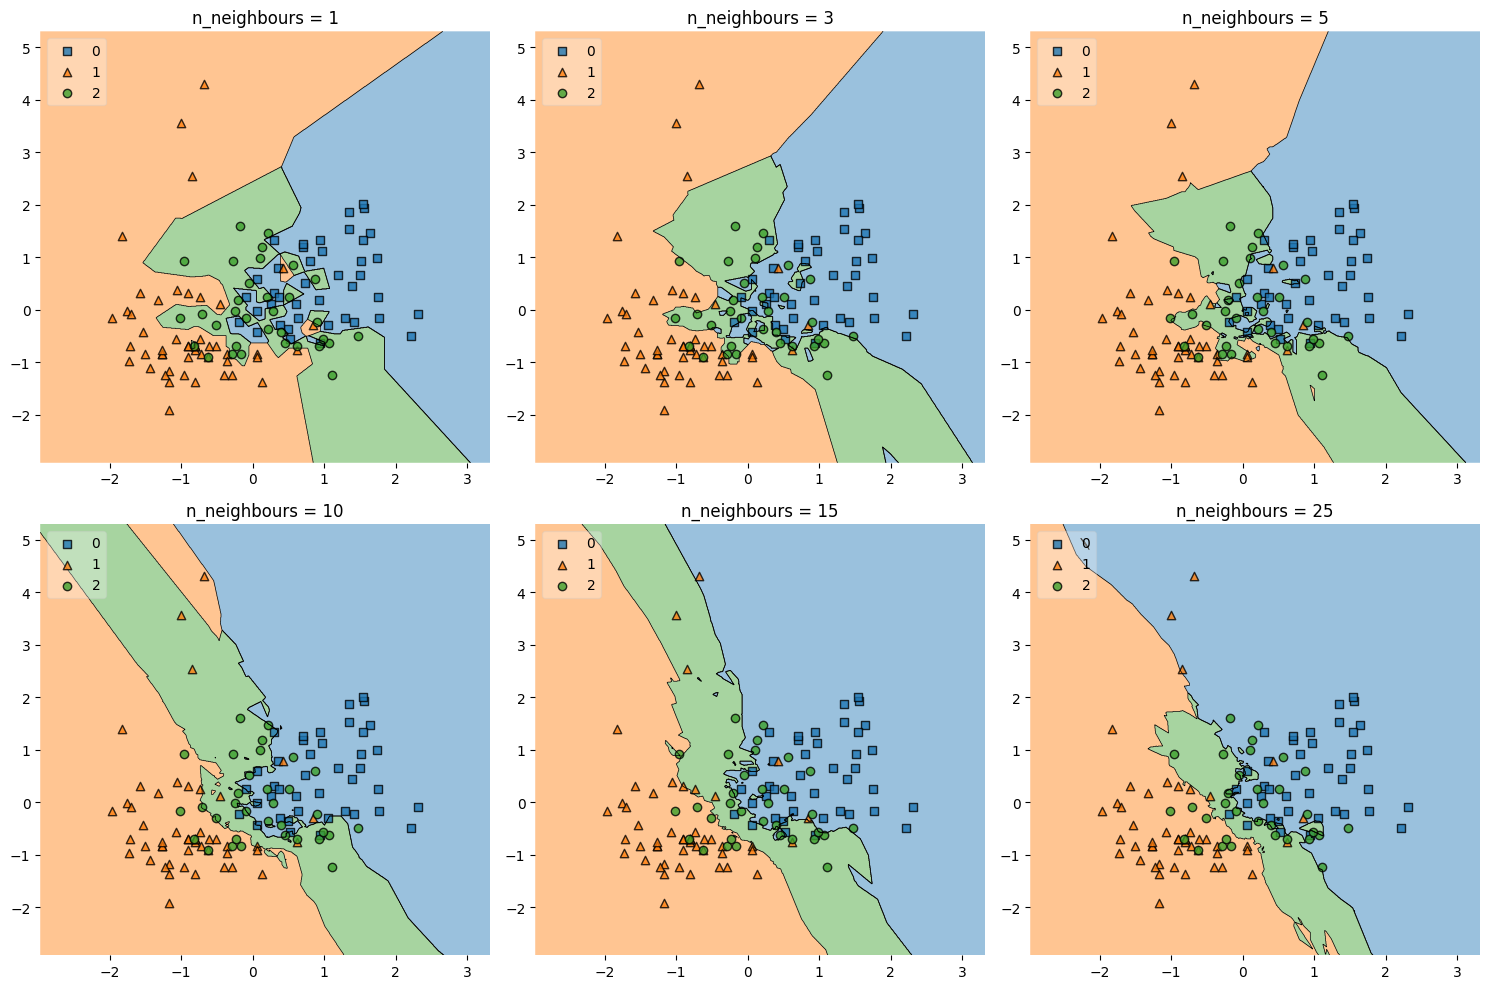

In [22]:
from itertools import product
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))

for clf, n, grid in zip(classifiers, n_neighbors_list, product([0, 1], [0, 1, 2])):
  ax = plt.subplot(gs[grid[0], grid[1]])
  fig = plot_decision_regions(
      X=X_train_s,
      y=y_train,
      clf=clf,
      legend=2
  )
  plt.title(f'n_neighbours = {n}')

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Высокая точность на трейне и низкая точность на тесте говорит о переобучении, это первый случай. Нам нужна максимальная точность на тестовых данных. Это при н = 5, 15 и 25. С точки зрения геометрии нам нужна поверхность, которая явно делит данные на классы, без излишнего огрубления или очень сложных рубленых поверхностей. Как будто наиболее оптимальное число соседей это 15. Точность на трейне и тесте одинаковая, а разделяющая поверхность явная, спокойная и без лишних огрублений или уточнений

### Задание 2. KNN своими руками.

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

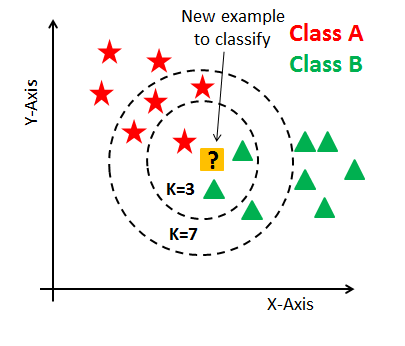

In [28]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = np.array(X)
      self.y_train = np.array(y)

    def predict(self, X):
      return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
      distances = [self.count_distance(x, x_train) for x_train in self.X_train]

      k_indices = np.argsort(distances)[:self.k]

      k_nearest_labels = [self.y_train[i] for i in k_indices]

      most_common = Counter(k_nearest_labels).most_common(1)[0][0]

      return most_common

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))

In [29]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [30]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [1]:
!kaggle datasets download -d shivam2503/diamonds
!unzip diamonds.zip

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 27.2MB/s]
Archive:  diamonds.zip
  inflating: diamonds.csv            


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [6]:
data = data.drop(data.columns[0], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [7]:
X_real = data.select_dtypes(include=['float64', 'int64'])

print(X_real.corr())

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


Более всего с ценой коррелирует carat, то есть буквально размер алмаза в каратах. Также очевидна корреляция с x, y, z, то есть тоже с размерами

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [8]:
cat_features = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data=data, columns=cat_features, drop_first=True)

print(data_encoded.head(4))

   carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43     False       True   
1   0.21   59.8   61.0    326  3.89  3.84  2.31     False      False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      True      False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63     False      False   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0        False  ...    False    False    False       False        False   
1         True  ...    False    False    False       False         True   
2        False  ...    False    False    False       False        False   
3         True  ...    False     True    False       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         False         False  
1        False        False        False         False         False  
2        False         True        False         F

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [9]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, y_train.shape)

(37758, 23) (37758,)


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train_s, y_train)

y_train_pred = model.predict(X_train_s)
y_test_pred = model.predict(X_test_s)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Ошибка на test: {train_mse:.2f}")
print(f"Ошибка на test {test_mse:.2f}")

Ошибка на test: 1270791.85
Ошибка на test 1291193.90


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [12]:
coefficients = model.coef_

feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df)

          Feature  Coefficient
0           carat  5307.717343
1           depth   -90.909302
2           table   -63.022745
3               x -1089.756486
4               y     0.346573
5               z   -40.204498
6        cut_Good   177.312094
7       cut_Ideal   420.765029
8     cut_Premium   344.490788
9   cut_Very Good   311.980757
10        color_E   -87.941433
11        color_F  -105.976741
12        color_G  -204.567200
13        color_H  -353.412331
14        color_I  -452.127949
15        color_J  -525.758304
16     clarity_IF   959.220402
17    clarity_SI1  1592.525226
18    clarity_SI2  1038.761686
19    clarity_VS1  1659.362719
20    clarity_VS2  1814.473418
21   clarity_VVS1  1280.196533
22   clarity_VVS2  1456.147658


Наиболее важный признак это Carat, что и показывала матрица корреляций. Также важен признак Clarity. В то же время y абсолютно неважный признак, в десятки тысяч раз менее важный, чем Carat и Clarity

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [13]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_train_s, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train_s, y_train)

lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

coefs_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Original': coefficients,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef
})

print(coefs_df)

          Feature     Original        Lasso        Ridge
0           carat  5307.717343  4825.591889  5270.623943
1           depth   -90.909302  -100.045814   -89.294951
2           table   -63.022745   -73.612934   -63.214765
3               x -1089.756486  -659.976427 -1049.459601
4               y     0.346573    -0.000000    -1.696406
5               z   -40.204498   -33.748132   -43.543168
6        cut_Good   177.312094    48.466806   177.606753
7       cut_Ideal   420.765029   207.416634   421.414874
8     cut_Premium   344.490788   152.773649   345.135106
9   cut_Very Good   311.980757   136.237880   312.910240
10        color_E   -87.941433   -17.843771   -87.525467
11        color_F  -105.976741   -39.293853  -105.754746
12        color_G  -204.567200  -126.933901  -203.967801
13        color_H  -353.412331  -280.705952  -352.511301
14        color_I  -452.127949  -379.284468  -450.784438
15        color_J  -525.758304  -465.592801  -524.434272
16     clarity_IF   959.220402 

Ridge как будто вообще не повлиял на веса. Lasso действительно снижает модуль весов, иногда в разы, иногда на 20-30%. Судя по изменению весов, проблема была не критичной

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [14]:
alphas = [0.1, 1, 10, 100, 200]

lasso_norms = []
ridge_norms = []

for alpha in alphas:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(X_train_s, y_train)
  lasso_norms.append(np.linalg.norm(lasso.coef_))

  ridge = Ridge(alpha=alpha, max_iter=10000)
  ridge.fit(X_train_s, y_train)
  ridge_norms.append(np.linalg.norm(ridge.coef_))

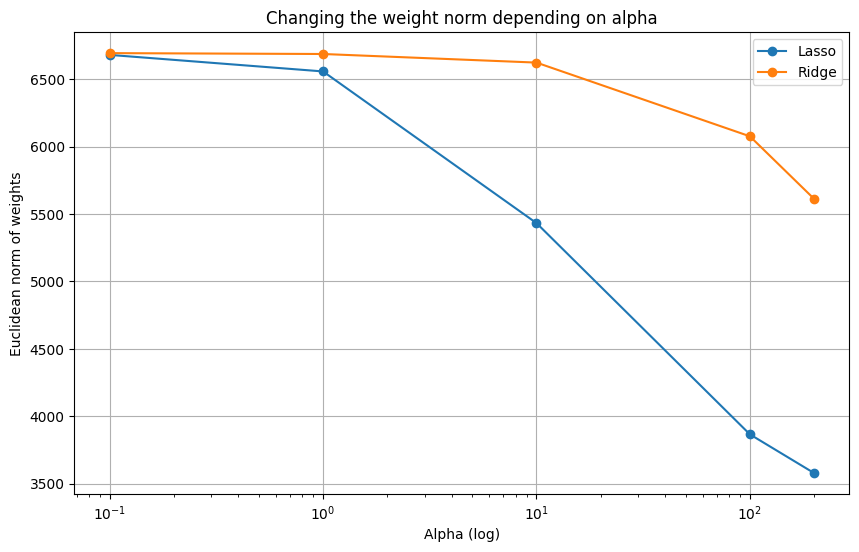

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Lasso', marker='o')
plt.plot(alphas, ridge_norms, label='Ridge', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log)')
plt.ylabel('Euclidean norm of weights')
plt.title('Changing the weight norm depending on alpha')
plt.legend()
plt.grid(True)
plt.show()

Лассо действительно эффективнее занижает веса. L1 регуляризация может обнулять коэффициенты ненужных признаков, а Ridge и его L2 лишь занижают эти коэффициенты. Lasso создает более разреженные модели, ускоряющие обучение и упрощающие интерпретацию

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [25]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_s, y_train)

mse_path = lasso_cv.mse_path_

mean_mse = mse_path.mean(axis=1)

print('alphas:', lasso_cv.alphas_)
print('mse:', mean_mse)

print('optimal alpha:', lasso_cv.alpha_,
      '\n', 'min mse:', min(mean_mse))

alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
mse: [2155989.96529794 1785210.83837407 1334837.90792382 1276161.31967238
 1287984.82784554]
optimal alpha: 1.0 
 min mse: 1276161.319672379


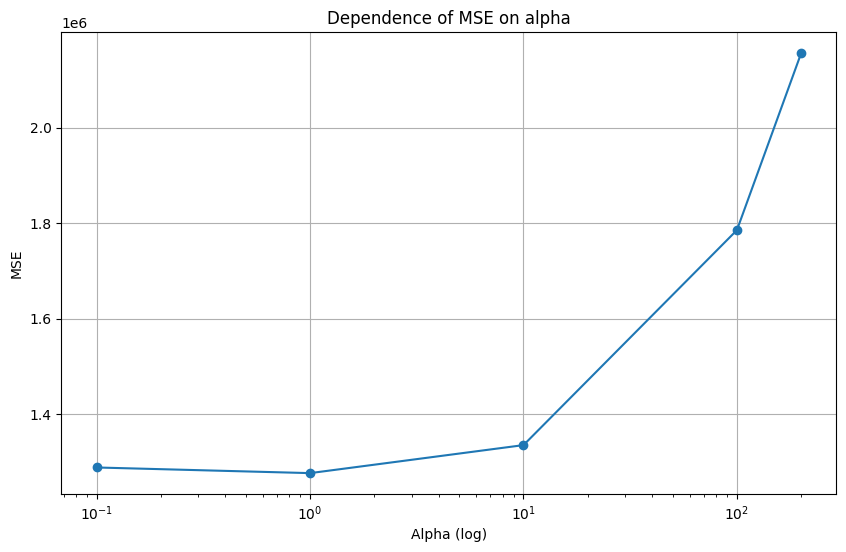

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mean_mse, marker='o')

plt.xscale('log')
plt.xlabel('Alpha (log)')
plt.ylabel('MSE')
plt.title('Dependence of MSE on alpha')
plt.grid(True)
plt.show()

По таблице и по графику видно, что лучшее значение при alpha = 1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [31]:
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train_s, y_train)

lasso_coef = lasso.coef_

feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coef
})

print(coef_df)

          Feature  Coefficient
0           carat  5259.479121
1           depth   -91.836082
2           table   -64.079225
3               x -1046.564711
4               y    -0.000000
5               z   -39.469813
6        cut_Good   164.532145
7       cut_Ideal   399.618347
8     cut_Premium   325.477093
9   cut_Very Good   294.566353
10        color_E   -80.935290
11        color_F   -99.311116
12        color_G  -196.804253
13        color_H  -346.143156
14        color_I  -444.841461
15        color_J  -519.737311
16     clarity_IF   927.475466
17    clarity_SI1  1518.312781
18    clarity_SI2   974.355596
19    clarity_VS1  1596.561546
20    clarity_VS2  1741.835827
21   clarity_VVS1  1236.221312
22   clarity_VVS2  1405.514751


Наиболее информативным очевидно оказался вес в каратах и чистота алмаза, а также размер по X, причем с отрицательным знаком. Неинформативными оказались размер по Y и Z, а также ширина и глубина. Смысловое объяснение - очевидно, чем тяжелее и прозрачнее алмаз, тем он дороже. Размеры алмаза видимо мало влияют на стоимость, хотя Х влияет сильно. Наверное никому не нравятся узкие продолговатые алмазы, похожие на палку?

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train)

lasso_pred = lasso.predict(X_test_s)
lin_reg_pred = lin_reg.predict(X_test_s)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

print(f"MSE Lasso-регрессии: {lasso_mse:.2f}")
print(f"MSE обычной линейной регрессии: {lin_reg_mse:.2f}")

MSE Lasso-регрессии: 1290690.88
MSE обычной линейной регрессии: 1291193.90


Лассо оказалась немного лучше, так как она уменьшает влияние мультиколлинеарности и убирает неинформативные признаки, делая модель более устойчивой и интерпретируемой